In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '../data', train=True, download=True, transform=transform) # torchivision transform
test_DS = datasets.MNIST(root = '../data', train=False, download=True, transform=transform)

In [39]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


# Data EDA

In [3]:
print(train_DS)
print(len(train_DS))

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None
60000


In [4]:
print(test_DS)
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None
10000


In [5]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [7]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [8]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [9]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## 데이터 시각화

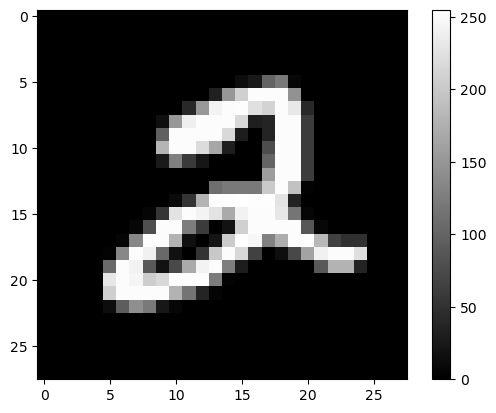

In [10]:
plt.imshow(train_DS.data[5], cmap="gray")
plt.colorbar()

In [11]:
print(train_DS.targets[5])

tensor(2)


# Dataloader 확인

In [12]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
# shuffle=False, 데이터가 들어가있는 순서대로 준다
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [13]:
print(len(train_DL)) # 배치 수
print(len(train_DS)/BATCH_SIZE)
print()
print(len(train_DL.dataset)) # len(train_DS)와 동일

1875
1875.0

60000


- train_DS.data : 직접 데이터 접근
- train_DL.dataset : dataset에 대한 정보를 담음 > 직접 접근 X

In [14]:
x, y = next(iter(train_DL))
print(type(train_DS.data))
print(type(x))
print()
print(x.shape) # 28x28 채널 1개가 32개 있다 > 흑백 사진 (채널=1), 컬러사진 (채널=3)
print(y.shape) # 해당 32개 데이터에 대한 정답 label

<class 'torch.Tensor'>
<class 'torch.Tensor'>

torch.Size([32, 1, 28, 28])
torch.Size([32])


현재는 type이 동일하지만, Dataloader는 dataset에서 정의되었던 transform을 통과시켜서 준다
- 이후에 type 확인

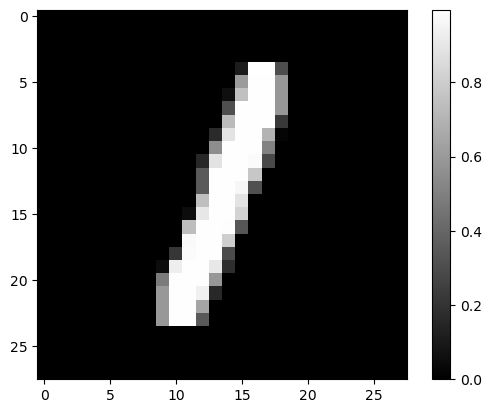

In [15]:
plt.imshow(x[0].squeeze(), cmap="gray")
# x[0].squeeze() 현재는 shape이 (1x28x28)이므로, squeeze를 통해 1 없앰
plt.colorbar()

colorbar가 0~256 > 0.0~1.0으로 바뀜
- ToTensor()가 자동으로 바꾸어준 것

ToTensor() 역할
1. tensor 로 변환
2. 개채행열
- (?, 28, 28) > (?, 1, 28, 28) >> 채널 추가한 shape로 변화
3. 0~1 사이로 변환 (int -> float)

In [16]:
print(train_DS.data[0][5])
print(x.data[0][0][7]) # 채널 dim이 하나 더 추가되었으므로 index 더 추가

tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
         18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       dtype=torch.uint8)
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3098, 0.9922, 0.9922, 0.9922,
        0.5882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])


# Model

In [17]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
      super().__init__()

      self.linear = nn.Sequential(nn.Linear(28*28, 100), # 28*28 pixel을 가진 이미지를, 하나의 pixel을 feature로 본다
                                  # 즉, 28*28 feature를 매칭할 28*28 노드 수가 있는 것
                                  nn.ReLU(),
                                  nn.Linear(100,10)) # 10개로 분류할 것이므로

  def forward(self, x):
      x = torch.flatten(x, start_dim=1)
      x = self.linear(x)
      return x

In [18]:
model = MLP()
x, _ = next(iter(train_DL))

model(x).shape # 엥. 에러가 떠야하는디.

torch.Size([32, 10])

원래는 nn.Linear(28*28, 10)(torch.Tensor(28*28))가 되어야하는데,
나는 된다.

In [19]:
x = torch.flatten(x, start_dim=1)
print(x.shape) # index=1 부터 시작해서 끝까지 펴준다
# 32x1x28x28 > 32x(1*28*28) > 32x784

torch.Size([32, 784])


## Model Train

In [44]:
from torch import optim

lr = 1e-3
epoch = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def Train(model, train_DL, criterion, optimizer):
  NoT = len(train_DL.dataset)
  loss_hist = []

  for ep in range(epoch):
    tloss = 0
    for x, y in train_DL:
      x = x.to(DEVICE)
      y = y.to(DEVICE)
      y_hat = model(x)
      loss = criterion(y_hat, y)

      optimizer.zero_grad() # grad 누적 초기화
      loss.backward() # backpropagation
      optimizer.step() # weight update

      loss_b = loss.item() * x.shape[0]
      tloss += loss_b
    loss_mean = tloss/NoT
    loss_hist += [loss_mean]
    ###
      # nn.CrossEntropyLoss() : 평균 CE를 구해준다 > batch size가 32니까 1/32 시그마 CE를 해준다
      # 근데 여기서는 1/6만장 시그마 CE를 구하고 싶다
      # 그래서 배치사이즈를 곱해서 모든 6만개의 데이터에 대한 시그마 CE를 얻고, 1/6만개로 나누는 것
    print(f"Epoch: {ep+1}, train loss: {round(loss_mean,3)}")
    print("-"*20)
  return loss_hist

### Cross Entropy 확인

기본적으로 softmax가 내제되어 있다

In [45]:
import torch.nn.functional as F

# data는 세 개, 5 종류로 분류하는 문제 가정
y_hat = torch.randn(3, 5) # y_hat이 다음과 같이 나왔을 때 softmax 통과 전 linear만 거친 데이터라고 하자
print(y_hat)
y = torch.randint(5, (3,)) # 0~4까지 3개 뽑아라
print(y) # 정답
# y_batch가 [4, 1, 4]라면, softmax를 지난 후에
  # [0, 0, 0, 1, 0]
  # [0, 1, 0, 0, 0]
  # [0, 0, 0, 1, 0]
# 으로 나와야 할 것

# 방법 1
loss = F.cross_entropy(y_hat, y)
print(loss)

# 방법 2
loss = nn.CrossEntropyLoss()(y_hat, y)
print(loss)

# 방법 3
y_hat_soft = F.softmax(y_hat, dim=1)
# 각 값이 0~1이며, 행의 총합이 1인 행렬
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
  loss += -torch.log(val[y[i]]) # val[y[i]] : 정답 위치에 있는 value = q
  # Loss = sigma(-log q)
print(loss/3) # CE는 평균으로 계산되어 나오므로,

tensor([[-0.3491, -0.2944,  0.0076, -0.5098, -0.5513],
        [-1.5430,  1.7436, -0.2867,  0.6284, -0.2528],
        [ 1.0682, -0.2090, -0.7216,  0.3898,  0.8161]])
tensor([1, 3, 4])
tensor(1.4822)
tensor(1.4822)
tensor([[0.1941, 0.2050, 0.2772, 0.1652, 0.1585],
        [0.0229, 0.6126, 0.0804, 0.2009, 0.0832],
        [0.3662, 0.1021, 0.0612, 0.1858, 0.2846]])
tensor(1.4822)


<img src="image/CE_softmax.png" width="600">

이미 포함되어 있기 때문 !

## 모델 테스트

Epoch: 1, train loss: 0.31
--------------------
Epoch: 2, train loss: 0.145
--------------------
Epoch: 3, train loss: 0.099
--------------------
Epoch: 4, train loss: 0.076
--------------------
Epoch: 5, train loss: 0.06
--------------------
Epoch: 6, train loss: 0.05
--------------------
Epoch: 7, train loss: 0.041
--------------------
Epoch: 8, train loss: 0.034
--------------------
Epoch: 9, train loss: 0.028
--------------------
Epoch: 10, train loss: 0.024
--------------------


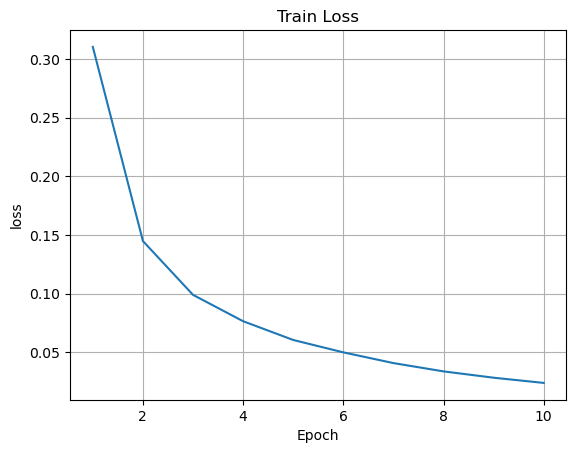

In [47]:
model = MLP().to(DEVICE) # x, y, model 다 DEVICE 위에 올려줘야 한다
# 하나라도 안 올라가면 에러

optimizer = optim.Adam(model.parameters(), lr=lr)
loss_history = Train(model, train_DL, criterion, optimizer)

plt.plot(range(1,epoch+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Train Loss")
plt.grid()

## 모델 save

In [52]:
model.state_dict() # 현재 학습한 parameters 확인

OrderedDict([('linear.0.weight',
              tensor([[-0.0253, -0.0269, -0.0176,  ..., -0.0353, -0.0212,  0.0313],
                      [-0.0265, -0.0335,  0.0002,  ..., -0.0143,  0.0144,  0.0051],
                      [-0.0259,  0.0298, -0.0014,  ...,  0.0257,  0.0340, -0.0023],
                      ...,
                      [-0.0183,  0.0304, -0.0294,  ..., -0.0316,  0.0205, -0.0327],
                      [ 0.0009, -0.0115,  0.0153,  ..., -0.0331,  0.0175, -0.0225],
                      [ 0.0264, -0.0198, -0.0068,  ..., -0.0109, -0.0317,  0.0327]])),
             ('linear.0.bias',
              tensor([ 0.0403,  0.1103, -0.0813, -0.0117, -0.0713,  0.0102,  0.0844, -0.1528,
                      -0.0152,  0.0241,  0.1271,  0.1509,  0.1464,  0.2409,  0.0060,  0.3188,
                       0.1034,  0.1560,  0.0962,  0.1417,  0.2325,  0.0293, -0.0010,  0.0740,
                      -0.1722,  0.1813,  0.1196,  0.1481,  0.0711, -0.2672, -0.1573,  0.0026,
                      -0.1

In [53]:
save_model_path = "./model_save/MLP_MNIST.pt"
torch.save(model.state_dict(), save_model_path)
# torch.save(model, save_model_path) # 모델 자체를 저장 가능

In [54]:
load_model = MLP().to(DEVICE) # 랜덤한 값이 있는 모델
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE)) # 저장한 weight로 가져온다
# load_model = torch.load(save_model_path, map_location=DEVICE) 통채로 저장했을시
# map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음
  # 이걸 안해주면 GPU로 학습했던 걸 CPU로 돌리면 문제가 생김

<All keys matched successfully>

## 모델 테스트

In [63]:
model.eval()
def Test(model, test_DL):
  with torch.no_grad():
      rcorrect = 0
      # y_hat = model(X_test)로 해도 되지만, 메모리 한계가 있으니까 얘도 배치사이즈로 나누어서 해주는 것
      for x, y in test_DL:
        x = x.to(DEVICE)
        y = y.to(DEVICE)

        y_hat = model(x)
        pred = torch.argmax(y_hat, dim=1) #dim=1; 32x10 > 10개에 대해서 분류한 인덱스를 뽑아내야 하므로
        corrects_b = torch.sum(pred == y).item()
        # tensor 형태로 나오니까 .item() / torch.sum대신 .sum으로 해도 된다
        rcorrect += corrects_b
      accuracy_e = rcorrect/len(test_DL.dataset)*100
  print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

In [64]:
Test(load_model, test_DL)

Test accuracy: 9783/10000 (97.8 %)


In [65]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

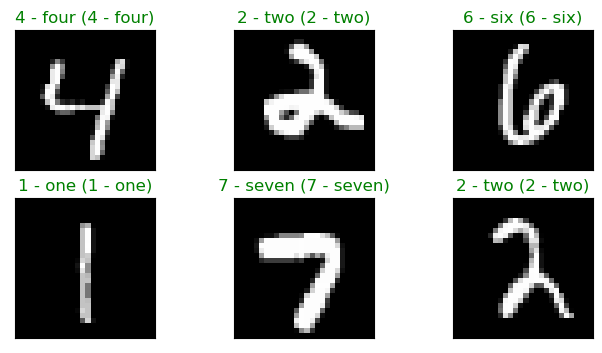

In [66]:
Test_plot(load_model, test_DL)

In [ ]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [ ]:
print(count_params(load_model))